In [2]:
import matplotlib.pyplot as plt
from glob import glob
import cv2
import random
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
import tensorflow as tf
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.15.0


**Preparing Dataset for training**

In [23]:
img_size = 50
batch_size = 64
datagen_train = ImageDataGenerator()
train_generator = datagen_train.flow_from_directory(r"C:\Users\DELL\Desktop\Emotion_Dection\Emotion_Detection\Data\train",target_size = (img_size,img_size),
                                                                     color_mode = "grayscale",
                                                   batch_size = batch_size,
                                                   class_mode = "categorical",
                                                   shuffle = True)

datagen_validation = ImageDataGenerator()
validation_generator = datagen_train.flow_from_directory(r"C:\Users\DELL\Desktop\Emotion_Dection\Emotion_Detection\Data\test",target_size = (img_size,img_size),
                                                                     color_mode = "grayscale",
                                                   batch_size = batch_size,
                                                   class_mode = "categorical",
                                                   shuffle = True)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


Defining Model

In [24]:
def Convolution(input_tensor, filters, kernel_size):
    x = Conv2D(filters = filters, kernel_size = kernel_size, padding = "same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size = (2,2))(x)
    x = Dropout(0.25)(x)
    
    return x

In [25]:
def Dense_f(input_tensor, nodes):
    x = Dense(nodes)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)
    
    return x

In [26]:
def model_fer(input_shape):
    inputs = Input(input_shape)
    conv_1 = Convolution(inputs,32,(3,3))
    conv_2 = Convolution(conv_1,64,(5,5))
    conv_3 = Convolution(conv_2,128,(3,3))

    flatten = Flatten()(conv_3)
    
    dense_1 = Dense_f(flatten,256)

    output  = Dense(7, activation="softmax")(dense_1)
    model  =  Model(inputs=[inputs],outputs = [output])
    
    model.compile(loss=['categorical_crossentropy'] , optimizer = 'adam' , metrics =["accuracy"])

    return model

In [27]:
model = model_fer((48,48,1))
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 48, 48, 32)        320       
                                                                 
 batch_normalization_8 (Bat  (None, 48, 48, 32)        128       
 chNormalization)                                                
                                                                 
 activation_8 (Activation)   (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 24, 24, 32)        0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 24, 24, 32)        0   

Initializing Model 

In [28]:
epochs = 20
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

checkpoint = ModelCheckpoint("model_weights.h5", monitor  ='val_accuracy', save_weights_only = True, mode = 'max', verbose =1)
callbacks = [checkpoint]

Training Model

In [29]:
history = model.fit(
x = train_generator,
steps_per_epoch = steps_per_epoch,
epochs = epochs,
validation_data = validation_generator,
validation_steps = validation_steps,
callbacks = callbacks)

Epoch 1/20


448/448 [==============================] - ETA: 0s - loss: 1.6812 - accuracy: 0.3591
Epoch 1: saving model to model_weights.h5
448/448 [==============================] - 466s 1s/step - loss: 1.6812 - accuracy: 0.3591 - val_loss: 1.6120 - val_accuracy: 0.3711
Epoch 2/20
448/448 [==============================] - ETA: 0s - loss: 1.3934 - accuracy: 0.4635
Epoch 2: saving model to model_weights.h5
448/448 [==============================] - 361s 805ms/step - loss: 1.3934 - accuracy: 0.4635 - val_loss: 1.4395 - val_accuracy: 0.4361
Epoch 3/20
448/448 [==============================] - ETA: 0s - loss: 1.2703 - accuracy: 0.5184
Epoch 3: saving model to model_weights.h5
448/448 [==============================] - 133s 296ms/step - loss: 1.2703 - accuracy: 0.5184 - val_loss: 1.2652 - val_accuracy: 0.5160
Epoch 4/20
448/448 [==============================] - ETA: 0s - loss: 1.2030 - accuracy: 0.5441
Epoch 4: saving model to model_weights.h5
448/448 [==============================] - 7

Model Evaluation

In [30]:
model.evaluate(validation_generator)

113/113 [==============================] - 160s 1s/step - loss: 1.1744 - accuracy: 0.6108


[1.174377202987671, 0.6107550859451294]

Plotting Loss

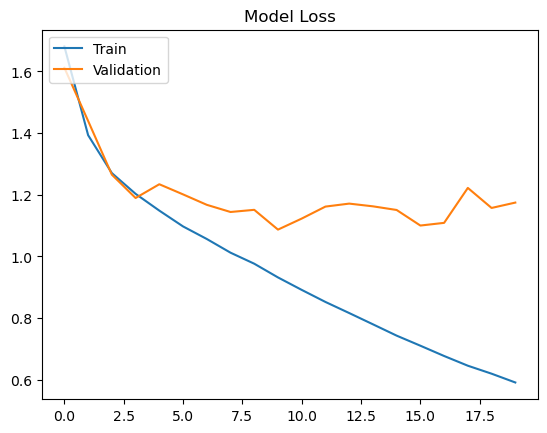

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.show()

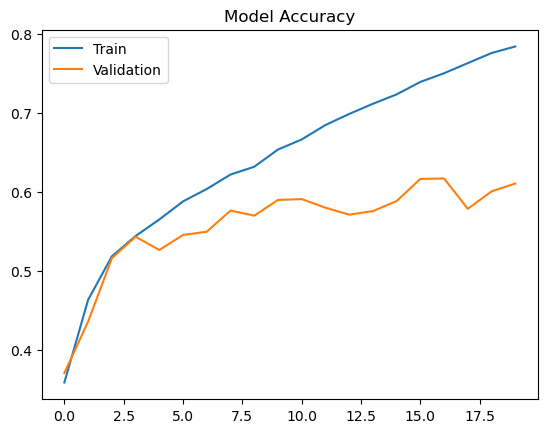

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.show()

Saving the model

In [33]:
model_json = model.to_json()
with open("model_a.json","w") as json_file:
    json_file.write(model_json)